In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
X_train = pd.read_csv('train_data.csv').values
y_train = pd.read_csv('train_label.csv').values.ravel()
X_val = pd.read_csv('val_data.csv').values
y_val = pd.read_csv('val_label.csv').values.ravel()
X_test = pd.read_csv('test_data.csv').values
y_test = pd.read_csv('test_label.csv').values.ravel()

In [ ]:
# Define values for C and gamma for Gaussian kernel
C_values = [1, 10, 100]
gamma_values = [0.01, 0.1, 1]
results = {}

In [ ]:
# Train models and record accuracies
for gamma in gamma_values:
    for C in C_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)

        # Get accuracies
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        # Store results
        results[(gamma, C)] = {
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_acc': test_acc,
            'model': model
        }

In [ ]:
# Accuracy table
accuracy_table = pd.DataFrame(
    [(gamma, C, res['train_acc'], res['val_acc'], res['test_acc'])
     for (gamma, C), res in results.items()],
    columns=['Gamma', 'C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
)
print("Accuracy Table:\n", accuracy_table)

Accuracy Table:
    Gamma    C  Train Accuracy  Validation Accuracy  Test Accuracy
0   0.01    1        0.414007             0.391304       0.405676
1   0.01   10        0.498333             0.421405       0.477462
2   0.01  100        0.537875             0.444816       0.495826
3   0.10    1        0.503573             0.431438       0.485810
4   0.10   10        0.546451             0.451505       0.499165
5   0.10  100        0.596951             0.488294       0.525876
6   1.00    1        0.587899             0.488294       0.519199
7   1.00   10        0.749881             0.505017       0.549249
8   1.00  100        0.970939             0.484950       0.504174


<ipython-input-13-3597c9939423>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-13-3597c9939423>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


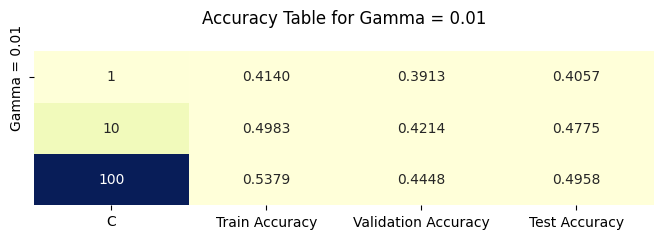

<ipython-input-13-3597c9939423>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-13-3597c9939423>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


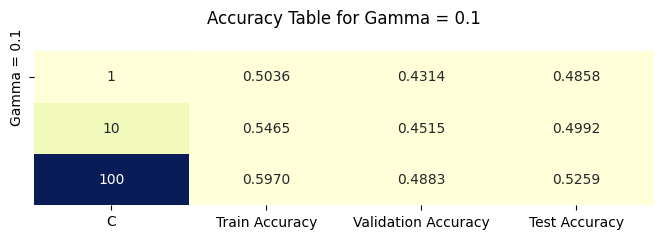

<ipython-input-13-3597c9939423>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_table['C'] = gamma_table['C'].astype(int)
<ipython-input-13-3597c9939423>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


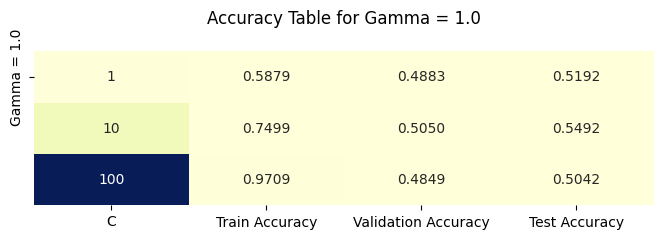

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List unique gamma values in the accuracy table
gammas = accuracy_table['Gamma'].unique()

# Generate a separate heatmap for each gamma value
for gamma in gammas:
    # Filter accuracy_table for the current gamma
    gamma_table = accuracy_table[accuracy_table['Gamma'] == gamma]

    # Convert 'C' column values to integers
    gamma_table['C'] = gamma_table['C'].astype(int)

    # Creating a custom annotation array to format 'C' as integers and other columns with 4 decimals
    annot = gamma_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']].copy()
    annot['C'] = annot['C'].astype(int)  # integer format for C
    annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")

    # Plotting the table with seaborn for a colorful, boxed format
    plt.figure(figsize=(8, 2))
    ax = sns.heatmap(gamma_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']],
                     annot=annot.values, fmt="", cmap="YlGnBu", cbar=False,
                     xticklabels=['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                     yticklabels=[f'Gamma = {gamma}'])

    # Adjusting title and layout
    plt.title(f'Accuracy Table for Gamma = {gamma}', pad=20)
    plt.xlabel("")  # Remove default x-axis label to avoid it at the bottom
    plt.ylabel("")  # Remove default y-axis label
    plt.show()

In [ ]:
# Identify best model based on validation accuracy (or test accuracy if tied)
best_params = max(results.items(), key=lambda x: (x[1]['val_acc'], x[1]['test_acc'], x[1]['train_acc']))
best_gamma, best_C = best_params[0]
best_model = best_params[1]['model']
print(f"Best model with gamma={best_gamma}, C={best_C}")

Best model with gamma=1, C=10


In [ ]:
# Confusion Matrices for best model
train_confusion = confusion_matrix(y_train, best_model.predict(X_train))
test_confusion = confusion_matrix(y_test, best_model.predict(X_test))

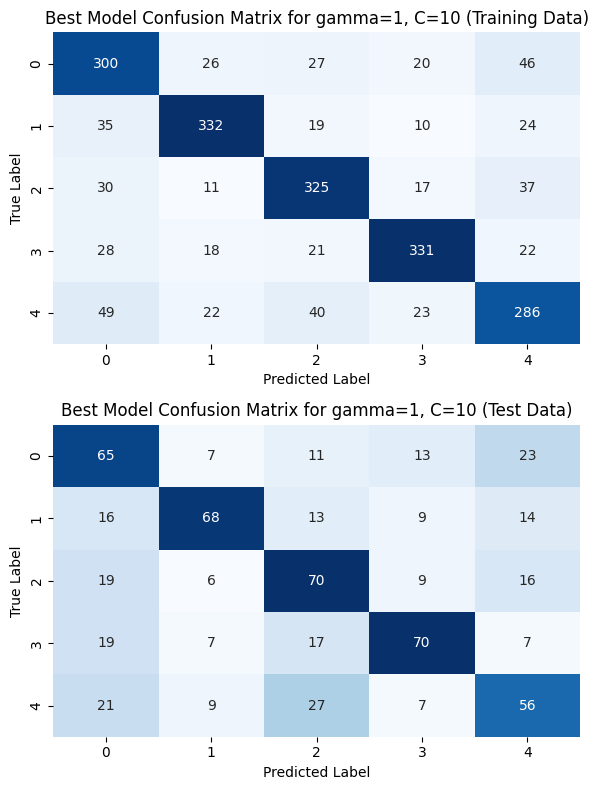

In [ ]:
# Plot confusion matrices as heatmaps
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
sns.heatmap(train_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title(f"Best Model Confusion Matrix for gamma={best_gamma}, C={best_C} (Training Data)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(test_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title(f"Best Model Confusion Matrix for gamma={best_gamma}, C={best_C} (Test Data)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [ ]:
# Support Vector Analysis
support_vectors = best_model.support_vectors_
dual_coef = np.abs(best_model.dual_coef_).flatten()

# Identify bounded (where dual_coef equals C) and unbounded support vectors
bounded_sv_indices = dual_coef == best_model.C
unbounded_sv_indices = (dual_coef > 0) & (dual_coef < best_model.C)

# Filter based on indices
bounded_sv = support_vectors[bounded_sv_indices[:support_vectors.shape[0]]]
unbounded_sv = support_vectors[unbounded_sv_indices[:support_vectors.shape[0]]]

# Calculate percentages
bounded_percentage = len(bounded_sv) / len(X_train) * 100
unbounded_percentage = len(unbounded_sv) / len(X_train) * 100

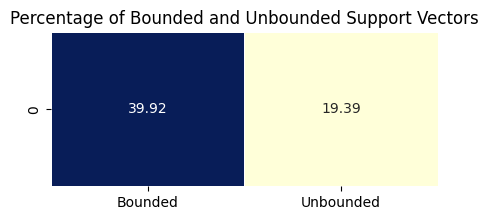

In [ ]:
# Display percentages as a heatmap
sv_data = pd.DataFrame({
    "Bounded": [bounded_percentage],
    "Unbounded": [unbounded_percentage]
})
plt.figure(figsize=(5, 2))
sns.heatmap(sv_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title("Percentage of Bounded and Unbounded Support Vectors")
plt.show()